# Playground

## Test 2D Wavelet Decomposition function
This function(fwdHaarDWT2D) computes the 2D Wavelet Transform in the image. All the input images are passed through a Haar Wavelet Decomposition module, to get the LL, LH, HL and HHH component of the image.

/var/folders/6l/73hl7r1n13g26sfz1kl3ghqm0000gn/T/ipykernel_16364/1810096236.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img = img.transpose(Image.FLIP_LEFT_RIGHT)


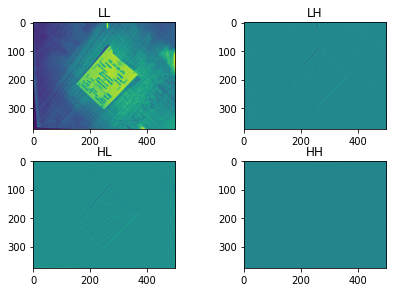

In [1]:
from PIL import Image
from matplotlib import pyplot as plt

from haar2D import fwdHaarDWT2D

img = Image.open('./positiveImages/350_letterbox1024.jpg').convert('L')
img = img.transpose(Image.FLIP_LEFT_RIGHT)
LL, LH, HL, HH = fwdHaarDWT2D(img)
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
axes[0, 0].imshow(LL)
axes[0, 1].imshow(LH)
axes[1, 0].imshow(HL)
axes[1, 1].imshow(HH)
axes[0, 0].set_title("LL")
axes[0, 1].set_title("LH")
axes[1, 0].set_title("HL")
axes[1, 1].set_title("HH")
plt.show()

## Test training data creation
The training images need to be put in two folders. positiveImages and negativeImages. positiveImages are the images which are captured from the display devices and has the presence of stron or weak Moiré patterms in it.
negativeImages are the ones without Moiré Patterns (i.e. the images which are not captured from the display devices) 

In [2]:
positiveImagePath = './positiveImages'
negativeImagePath = './negativeImages'

os.system("python createTrainingData.py {} {} {}".format(positiveImagePath, negativeImagePath, 0))
   

positive samples: 3
negative samples: 4


/Users/renan.cammarosano/dev/labs/Moire-Pattern-Detection/src/createTrainingData.py:79: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  imgGray = imgGray.transpose(Image.ROTATE_180)
/Users/renan.cammarosano/dev/labs/Moire-Pattern-Detection/src/createTrainingData.py:82: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imgGray = imgGray.transpose(Image.FLIP_LEFT_RIGHT)


training image rotated
training image rotated
training image rotated
Total positive files after augmentation:  9
Total negative files after augmentation:  12


0

## Test CNN training

In [3]:
positiveTrainImagePath = './trainDataPositive'
negativeTrainImagePath = './trainDataNegative'
epochs = 1
    
os.system("python train.py {} {} {} {} {}".format(positiveImagePath, negativeImagePath, positiveTrainImagePath, negativeTrainImagePath, epochs))


positive samples: 12
negative samples: 16
positive data loaded.
negative data loaded.
Total Samples Loaded:  30
[[0.05487804 0.04979675 0.04369919 ... 0.80691051 0.81300807 0.81402433]
 [0.81402433 0.81300807 0.80691051 ... 0.04369919 0.04979675 0.05487804]
 [0.05386179 0.06707317 0.05995935 ... 0.66666663 0.66463411 0.65142274]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[ 0.06157118  0.02335462  0.03184719 ...  0.03609347  0.0276009
   0.03184719]
 [-0.03184707 -0.02760078 -0.03609335 ... -0.03184707 -0.0233545
  -0.06157106]
 [ 0.01486205  0.04458604  0.04033976 ...  0.06157118  0.0276009
   0.0573249 ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.        

2022-06-21 16:22:24.458018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.69320, saving model to checkPoint/Weights-001--0.69320.hdf5
1/1 [==============================] - 0s 279ms/step
confusion matrix (test / validation)
true positive:  1
false positive: 0
true negative:  1
false negative: 1


accuracy:  66.6667 %
precision: 100.0000 %
recall:  50.0000 %


0

## Test CNN Evaluation

In [4]:
weightsFile = "moirePattern3CNN_.h5"
    
os.system("python test.py {} {} {}".format(weightsFile, positiveImagePath, negativeImagePath))


positive samples: 3
negative samples: 4


/Users/renan.cammarosano/dev/labs/Moire-Pattern-Detection/src/createTrainingData.py:79: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  imgGray = imgGray.transpose(Image.ROTATE_180)
/Users/renan.cammarosano/dev/labs/Moire-Pattern-Detection/src/createTrainingData.py:82: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imgGray = imgGray.transpose(Image.FLIP_LEFT_RIGHT)


training image rotated
training image rotated
training image rotated
Total positive files after augmentation:  9
Total negative files after augmentation:  12
positive samples: 12
negative samples: 16
positive data loaded.
negative data loaded.
Total Samples Loaded:  30
[[0.05487804 0.04979675 0.04369919 ... 0.80691051 0.81300807 0.81402433]
 [0.81402433 0.81300807 0.80691051 ... 0.04369919 0.04979675 0.05487804]
 [0.05386179 0.06707317 0.05995935 ... 0.66666663 0.66463411 0.65142274]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[ 0.06157118  0.02335462  0.03184719 ...  0.03609347  0.0276009
   0.03184719]
 [-0.03184707 -0.02760078 -0.03609335 ... -0.03184707 -0.0233545
  -0.06157106]
 [ 0.01486205  0.04458604  0.04033976 ...  0.06157118  0.0276009
   0.0573249 ]
 ...
 [ 0.          0.          0.         ...

2022-06-21 16:22:56.152150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 2s 2s/step
confusion matrix (test / validation)
true positive:  9
false positive: 0
true negative:  12
false negative: 7


accuracy:  75.0000 %
precision: 100.0000 %
recall:  56.2500 %


0